<a href="https://colab.research.google.com/github/berkkorkmaz/ml-projects/blob/main/data_analytics_all_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Industrial Data Analytics Course Project

**Problem 1**

In [ ]:
# !pip install factor_analyzer

In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,plot_roc_curve,r2_score
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
import sys

drive.mount('/content/drive') # Required code for working on Google Colab with my drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
% cd /content/drive/MyDrive/Colab Notebooks/industrial_data_analytics/Project/

# Change directory 

/content/drive/MyDrive/Colab Notebooks/industrial_data_analytics/Project


**Regression Methods**

NA values:  True


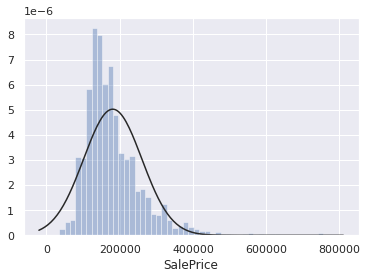

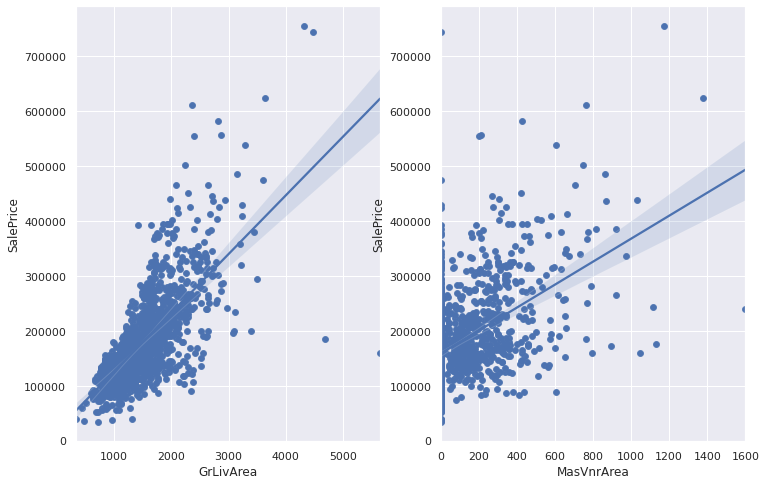

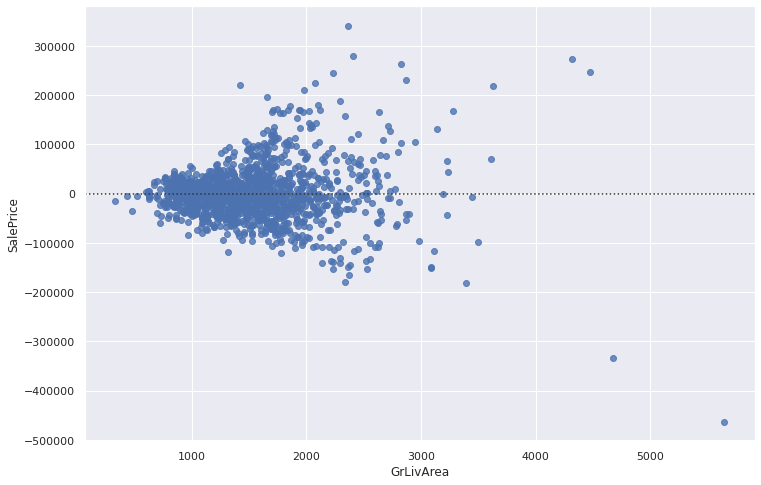

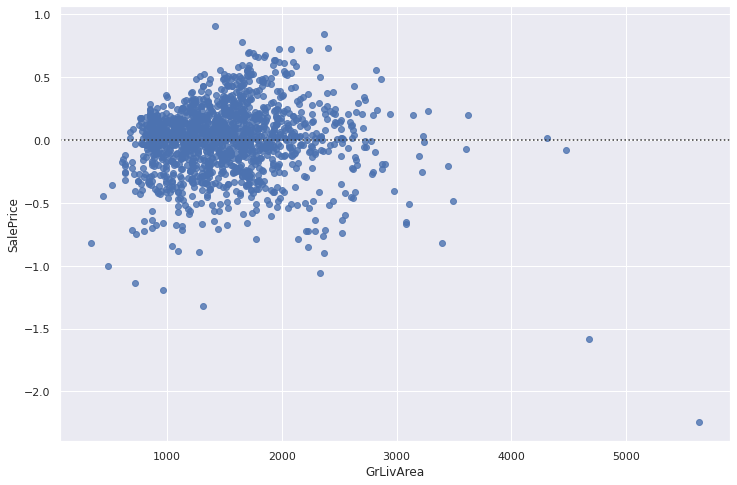

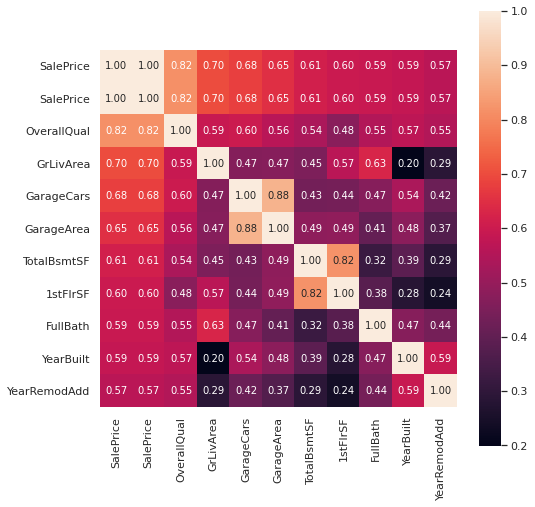

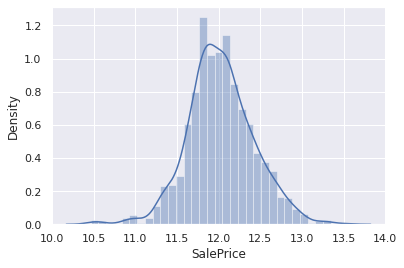

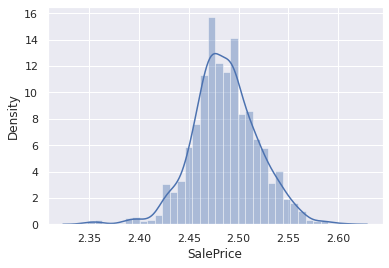

Multiple Linear Regression r2:  0.8563188769906049
Lasso Regression r2:  0.8592420392968163
Ridge Regression r2:  0.8566292668657358


In [332]:
data = pd.read_csv('housing.csv')

# Check for null values
print("NA values: ",data.isnull().values.any())
data.isnull().sum()[data.isnull().sum() > 0]

data.drop(["Alley","FireplaceQu","PoolQC","Fence","MiscFeature","LotFrontage"],axis=1,inplace=True) # Columns with more than half missing values are dropped

for col_name in data.columns:
    if(data[col_name].dtype == 'object'):
        data[col_name]= data[col_name].astype('category')
        data[col_name] = data[col_name].cat.codes

plt.show()
sns.distplot(data.SalePrice,fit=norm, kde=False) # It is right skewed not normally distributed

fig, (ax1, ax2) = plt.subplots(figsize = (12,8), ncols=2,sharey=False)
# Scatter plotting for SalePrice and GrLivArea. 
sns.scatterplot( x = data.GrLivArea, y = data.SalePrice,  ax=ax1)
sns.regplot(x=data.GrLivArea, y=data.SalePrice, ax=ax1)

# Scatter plotting for SalePrice and MasVnrArea. 
sns.scatterplot(x = data.MasVnrArea,y = data.SalePrice, ax=ax2)
sns.regplot(x=data.MasVnrArea, y=data.SalePrice, ax=ax2);

plt.subplots(figsize = (12,8))
sns.residplot(data.GrLivArea, data.SalePrice); 
# The value increases, the variance also increases, which is the characteristics known as Heteroscedasticity

data["SalePrice"] = np.log1p(data["SalePrice"])

# (almost an equal amount of variance across the zero lines
plt.subplots(figsize = (12,8))
sns.residplot(data.GrLivArea, data.SalePrice); 

# Checking for correlations
corr = data.corr()
corr = corr.sort_values('SalePrice')
cols = corr['SalePrice'][corr['SalePrice'].values > 0.5].index.values

heatMapCols=np.append(cols[-10:], np.array(['SalePrice']))
cm = np.corrcoef(data[heatMapCols[::-1]].T)
plt.figure(figsize=(8,8))
sns.set(font_scale=1)
with sns.axes_style("white"):
    sns.heatmap(cm,yticklabels=heatMapCols[::-1],xticklabels=heatMapCols[::-1],fmt='.2f',annot_kws={'size':10},annot=True,square=True,cmap=None)
plt.show()
plt.close()

data = data[cols] # Only values with higher than 0.5 correlation

# Train test split
y = data.pop('SalePrice')
X = data.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

imputer.fit(X_train)

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


sns.distplot(y_train) # It is right skewed not normally distributed
plt.show()
plt.close()

y_train = np.log(y_train)

sns.distplot(y_train) # Now it is closed to normal distribution
plt.show()
plt.close()

# Liner Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_preds_log = model.predict(X_test)
y_preds = np.exp(y_preds_log) #Inverse log transform for comparison
print("Multiple Linear Regression r2: " , metrics.r2_score(y_test,y_preds))

# Lasso Regression
Ls = LassoCV(alphas = [1, 0.1, 0.001, 0.0005])
Ls.fit(X_train, y_train)
y_preds_log = Ls.predict(X_test)
y_preds = np.exp(y_preds_log) #Inverse log transform for comparison
print("Lasso Regression r2: " , metrics.r2_score(y_test,y_preds))

# Ridge Regression
Ls = RidgeCV(alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10])
Ls.fit(X_train, y_train)
y_preds_log = Ls.predict(X_test)
y_preds = np.exp(y_preds_log) #Inverse log transform for comparison
print("Ridge Regression r2: " , metrics.r2_score(y_test,y_preds))

In [ ]:
# Dataset is obtained via: http://jse.amstat.org/v19n3/decock.pdf (http://lib.stat.cmu.edu/datasets/boston)

data = pd.read_csv('housing.csv')

# Check for null values
print("NA values: ",data.isnull().values.any())
data.isnull().sum()[data.isnull().sum() > 0]

data.drop(["Alley","FireplaceQu","PoolQC","Fence","MiscFeature","LotFrontage"],axis=1,inplace=True) # Columns with more than half missing values are dropped

for col_name in data.columns:
    if(data[col_name].dtype == 'object'):
        data[col_name]= data[col_name].astype('category')
        data[col_name] = data[col_name].cat.codes

# Checking for correlations
corr = data.corr()
corr = corr.sort_values('SalePrice')
cols = corr['SalePrice'][corr['SalePrice'].values > 0.5].index.values

heatMapCols=np.append(cols[-10:], np.array(['SalePrice']))
cm = np.corrcoef(data[heatMapCols[::-1]].T)
plt.figure(figsize=(8,8))
sns.set(font_scale=1)
with sns.axes_style("white"):
    sns.heatmap(cm,yticklabels=heatMapCols[::-1],xticklabels=heatMapCols[::-1],fmt='.2f',annot_kws={'size':10},annot=True,square=True,cmap=None)
plt.show()
plt.close()

data = data[cols] # Only values with higher than 0.5 correlation

# Train test split
y = data.pop('SalePrice')
X = data.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

imputer.fit(X_train)

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


sns.distplot(y_train) # It is right skewed not normally distributed
plt.show()
plt.close()

y_train = np.log(y_train)

sns.distplot(y_train) # Now it is closed to normal distribution
plt.show()
plt.close()

# Liner Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_preds_log = model.predict(X_test)
y_preds = np.exp(y_preds_log) #Inverse log transform for comparison
print("Multiple Linear Regression RMSe: " , metrics.r2_score(y_test,y_preds))

# Lasso Regression
Ls = LassoCV(alphas = [1, 0.1, 0.001, 0.0005])
Ls.fit(X_train, y_train)
y_preds_log = Ls.predict(X_test)
y_preds = np.exp(y_preds_log) #Inverse log transform for comparison
print("Lasso Regression RMSe: " , metrics.r2_score(y_test,y_preds))

# Ridge Regression
Ls = RidgeCV(alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10])
Ls.fit(X_train, y_train)
y_preds_log = Ls.predict(X_test)
y_preds = np.exp(y_preds_log) #Inverse log transform for comparison
print("Ridge Regression RMSe: " , metrics.r2_score(y_test,y_preds))

**Classification Methods**

NA values:  False
Data shape: (7043, 20)


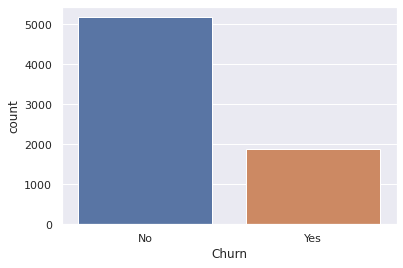

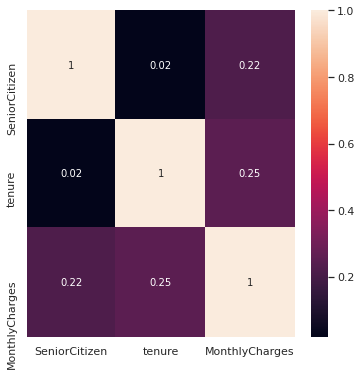


----------- Logistics Regression -----------
Best train ACC: 0.80
Best Params: {'C': 100}
              precision    recall  f1-score   support

           1       0.86      0.88      0.87      1061
           0       0.62      0.57      0.59       348

    accuracy                           0.81      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.80      0.81      0.80      1409


----------- k Nearest Neighbors -----------
Best train ACC: 0.76
Best Params: {'n_neighbors': 12}
              precision    recall  f1-score   support

           1       0.84      0.88      0.86      1061
           0       0.57      0.47      0.51       348

    accuracy                           0.78      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409


----------- Support Vector Machines -----------
Best train ACC: 0.79
Best Params: {'gamma': 0.1}
              precision    recall  f1-score   support

   

In [161]:
# Data is obtained via https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

data = pd.read_csv('churn.csv')

print("NA values: ",data.isnull().values.any())
data = data.drop('customerID',axis=1)
print("Data shape:", data.shape)
sns.countplot(x="Churn",data=data) # It is imbalanced data but I believe no need for resampling
plt.show()
plt.close()

# Checking if there is a correlated features
corr=data.corr().round(2)
plt.figure(figsize=(6,6))
sns.heatmap(corr, annot = True)
plt.show()
plt.close()

#Converting the categorical features into numeric
for col_name in data.columns:
    if(data[col_name].dtype == 'object'):
        data[col_name]= data[col_name].astype('category')
        data[col_name] = data[col_name].cat.codes

X=data.drop(columns=['Churn']) #selecting the inout features in X
y=data['Churn'] #target Churn in y

# Train - Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scaling is performed because distance sensitive algorithms is used
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# ----------- Logistics Regression -----------
print("\n----------- Logistics Regression -----------") 
clf = LogisticRegression(random_state=1)
cv_rep = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1) # 2 times 5 fold CV operation

# Hyper parameter optimization with Gridsearch
grid={"C":[0.001,0.01,0.1,1,10,100]}
search = GridSearchCV(clf,grid,cv=cv_rep,scoring='accuracy') #Grid search
results = search.fit(X_train,y_train)

print('Best train ACC: %.2f' % (np.absolute(results.best_score_)))
print('Best Params: %s' % results.best_params_)

# Train and test with best parameters
lr_clf = LogisticRegression(**results.best_params_)
model=lr_clf.fit(X_train, y_train)
pred_test = model.predict(X_test)

print(classification_report(y_test, pred_test, target_names=["1","0"]))
# ----------- /Logistics Regression ----------- 

# ----------- kNN ----------- 
print("\n----------- k Nearest Neighbors -----------")
clf = KNeighborsClassifier()
cv_rep = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1) # 2 times 5 fold CV operation

# Hyper parameter optimization with Gridsearch
grid={'n_neighbors' : [3,5,7,9,12]}
search = GridSearchCV(clf,grid,cv=cv_rep,scoring='accuracy') #Grid search
results = search.fit(X_train,y_train)

print('Best train ACC: %.2f' % (np.absolute(results.best_score_)))
print('Best Params: %s' % results.best_params_)

# Train and test with best parameters
knn_clf = KNeighborsClassifier(**results.best_params_)
model=knn_clf.fit(X_train, y_train)
pred_test = model.predict(X_test)

print(classification_report(y_test, pred_test, target_names=["1","0"]))
# ----------- /kNN ----------- 

# ----------- Support Vector Machines ----------- 
print("\n----------- Support Vector Machines -----------")
clf = SVC()
cv_rep = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1) # 2 times 5 fold CV operation

# Hyper parameter optimization with Gridsearch
grid={'gamma' : [0.1,1,10]}
search = GridSearchCV(clf,grid,cv=cv_rep,scoring='accuracy') #Grid search
results = search.fit(X_train,y_train)

print('Best train ACC: %.2f' % (np.absolute(results.best_score_)))
print('Best Params: %s' % results.best_params_)

# Train and test with best parameters
svc_clf = SVC(**results.best_params_)
model=svc_clf.fit(X_train, y_train)
pred_test = model.predict(X_test)

print(classification_report(y_test, pred_test, target_names=["1","0"]))
# ----------- /Support Vector Machines ----------- 

# ----------- Decision Trees ----------- 
print("\n----------- Decision Tree -----------")
clf = DecisionTreeClassifier()
cv_rep = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1) # 2 times 5 fold CV operation

# Hyper parameter optimization with Gridsearch
grid=[{'criterion' : ['gini', 'entropy'],
      'max_depth' : [2,4,8,12]}]
search = GridSearchCV(clf,grid,cv=cv_rep,scoring='accuracy') #Grid search
results = search.fit(X_train,y_train)

print('Best train ACC: %.2f' % (np.absolute(results.best_score_)))
print('Best Params: %s' % results.best_params_)

# Train and test with best parameters
dt_clf = DecisionTreeClassifier(**results.best_params_)
model=dt_clf.fit(X_train, y_train)
pred_test = model.predict(X_test)

print(classification_report(y_test, pred_test, target_names=["1","0"]))
# ----------- /Decision Trees ----------- 

# ----------- Random Forest ----------- 
print("\n----------- Random Forest -----------")
clf = RandomForestClassifier()
cv_rep = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1) # 2 times 5 fold CV operation

# Hyper parameter optimization with Gridsearch
grid=[{'max_depth': [10, 50, 100],
      'n_estimators': [5,50,100]}]
search = GridSearchCV(clf,grid,cv=cv_rep,scoring='accuracy') #Grid search
results = search.fit(X_train,y_train)

print('Best train ACC: %.2f' % (np.absolute(results.best_score_)))
print('Best Params: %s' % results.best_params_)

# Train and test with best parameters
rf_clf = RandomForestClassifier(**results.best_params_)
model=rf_clf.fit(X_train, y_train)
pred_test = model.predict(X_test)

print(classification_report(y_test, pred_test, target_names=["1","0"]))
# ----------- /Random Forest ----------- 

# ----------- Gradientboost (GB)  ----------- 
print("\n----------- Gradientboost - GB -----------")
clf = GradientBoostingClassifier()
cv_rep = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1) # 2 times 5 fold CV operation

# Hyper parameter optimization with Gridsearch
grid=[{'min_samples_split': [250,500],
      'max_depth': [5,10]}]
search = GridSearchCV(clf,grid,cv=cv_rep,scoring='accuracy') #Grid search
results = search.fit(X_train,y_train)

print('Best train ACC: %.2f' % (np.absolute(results.best_score_)))
print('Best Params: %s' % results.best_params_)

# Train and test with best parameters
xgb_clf = GradientBoostingClassifier(**results.best_params_)
model=xgb_clf.fit(X_train, y_train)
pred_test = model.predict(X_test)

print(classification_report(y_test, pred_test, target_names=["1","0"]))
# ----------- /Gradientboost (GB) ----------- 

**Clustering Methods**

['Gender', 'Age', 'Income', 'Spend Score']

----------- K-Means -----------


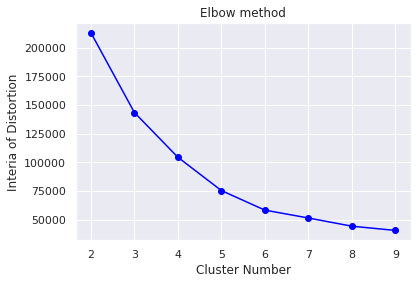

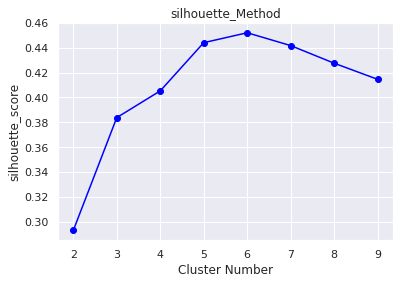

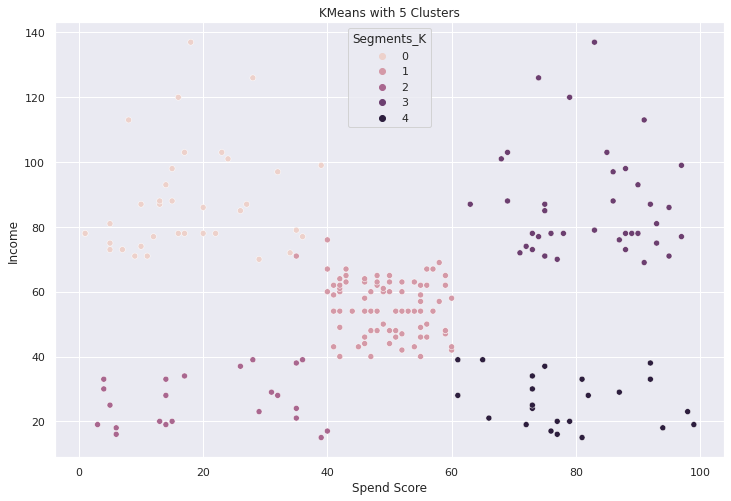

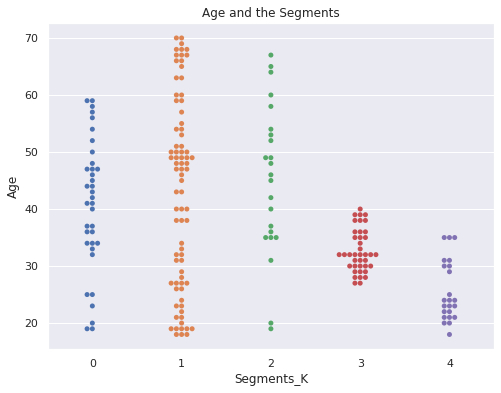

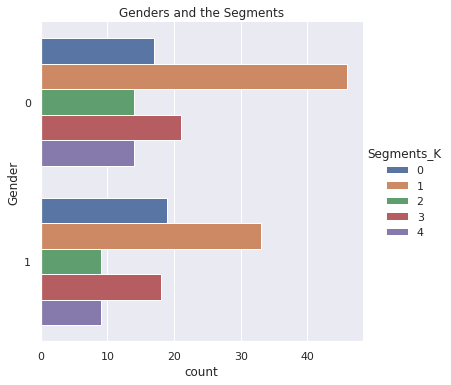


----------- Agglomerative Hierarchical Clustering -----------


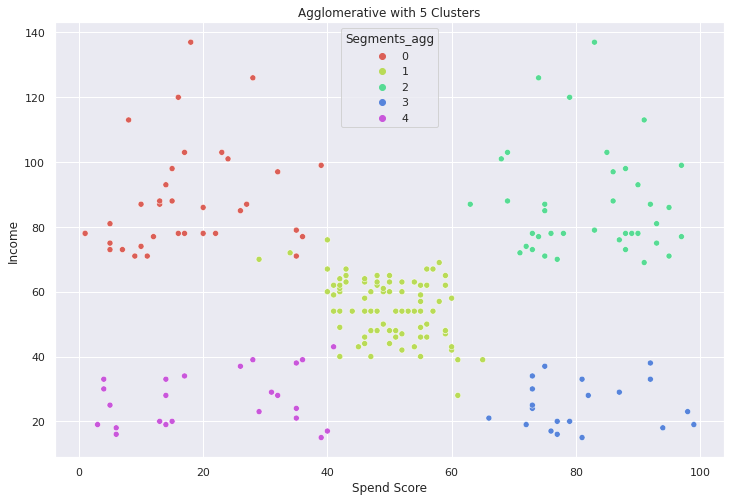

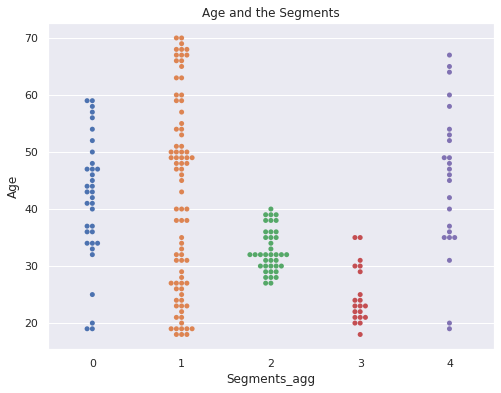

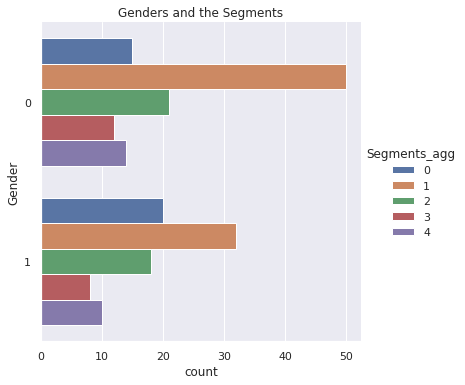

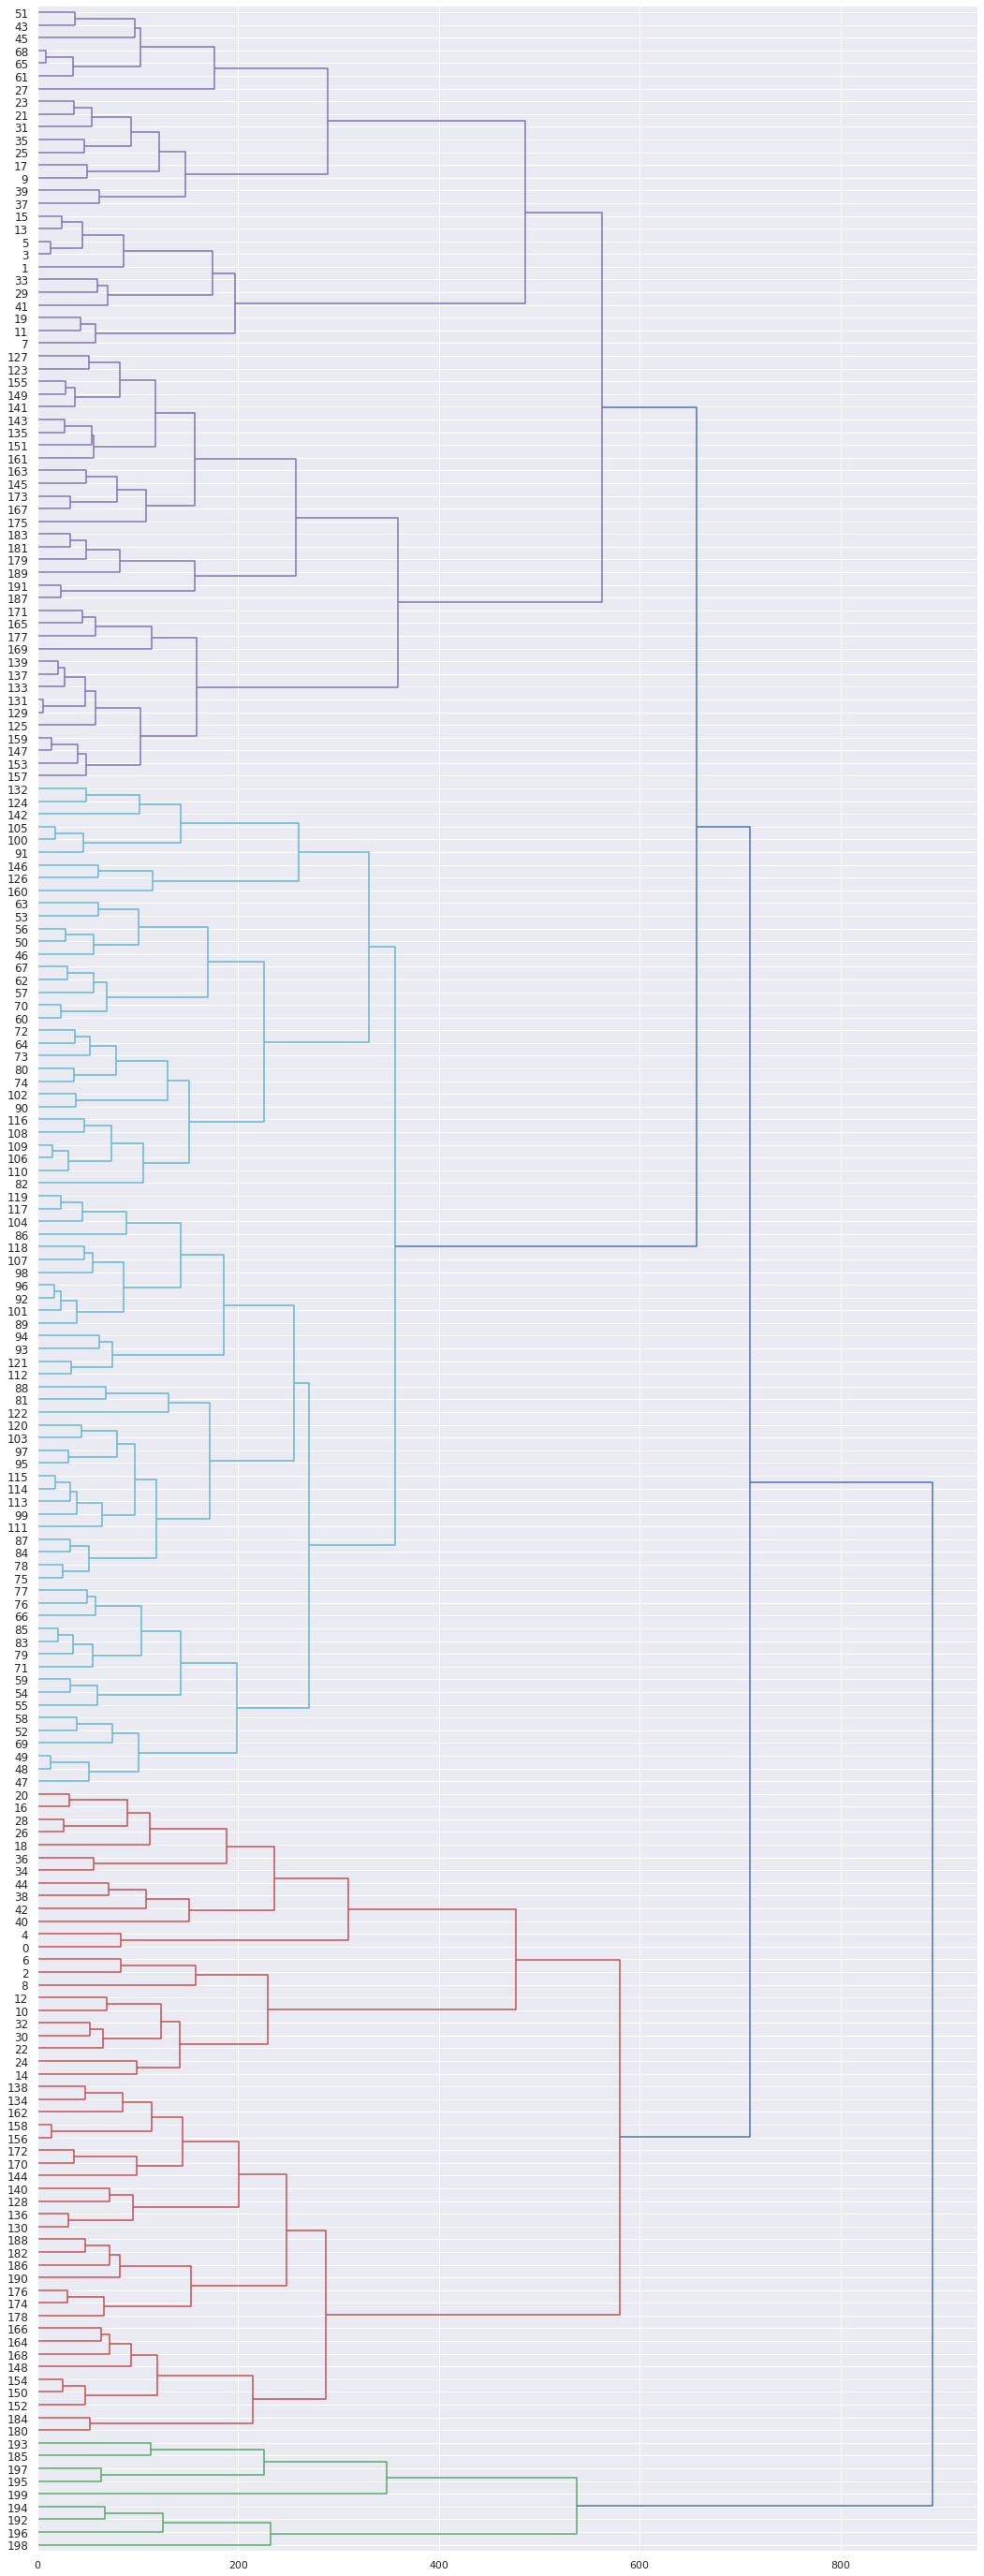

In [276]:
# Data is obtained via https://github.com/SteffiPeTaffy/machineLearningAZ/blob/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv

data = pd.read_csv('customers.csv')
data=data.drop('CustomerID',axis=1) #dropping ID

# Label encoding for categorical column (gender)
data["Gender"]= data["Gender"].astype('category')
data["Gender"] = data["Gender"].cat.codes

# Renaming headings for clear understanding
data.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Spend Score'}, inplace=True)
print(list(data.columns.values)) # List of column names

# ----------- K-Means  ----------- 
print("\n----------- K-Means -----------")
km_dataset = data.copy() 

#Calling Kmeans and running on the kmeans and calculating the scores of Interia_of_Distortion and silhouette_score
clusters = range(2,10)
silhouetteScore=[]
Interia_of_Distortion = []
for k in clusters:
    km = KMeans(n_clusters=k,init="k-means++")
    km.fit(km_dataset)
    pred = km.predict(km_dataset)
    Interia_of_Distortion.append(km.inertia_) 
    silhouetteScore.append(silhouette_score(km_dataset, pred))

    
#plotting the Interia of Distortion with clusters range of 2 and 9
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title("Elbow method")
ax.set_xlabel("Cluster Number")
ax.set_ylabel("Interia of Distortion")
plt.plot(clusters,Interia_of_Distortion,color='blue', marker="o")
plt.show()
plt.close()
#plotting the silhouette score with clusters range of 2 and 9
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title("silhouette_Method")
ax.set_xlabel("Cluster Number")
ax.set_ylabel("silhouette_score")
plt.plot(clusters,silhouetteScore,color='blue', marker="o")
plt.show()
plt.close()


# Where the silhouette score is the highest
km = KMeans(n_clusters=5,init="k-means++").fit(km_dataset)
km_dataset['Segments_K'] = km.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(km_dataset['Spend Score'], km_dataset['Income'], hue=km_dataset['Segments_K'])
plt.title('KMeans with 5 Clusters')
plt.show()
plt.close()

plt.figure(figsize=(8, 6))
sns.swarmplot(x='Segments_K', y='Age', data=km_dataset)
plt.title('Age and the Segments')
plt.show()
plt.close()

sns.catplot(y="Gender", hue="Segments_K", kind="count",
            data=km_dataset)
plt.title('Genders and the Segments')
plt.show()
plt.close()
# ----------- /K-Means  ----------- 

# ----------- Agglomerative  ----------- 
print("\n----------- Agglomerative Hierarchical Clustering -----------")
agglom_dataset = data.copy() 
agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(agglom_dataset)

agglom_dataset['Segments_agg'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(agglom_dataset['Spend Score'], agglom_dataset['Income'], hue=agglom_dataset['Segments_agg'], 
                palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 5 Clusters')
plt.show()

plt.figure(figsize=(8, 6))
sns.swarmplot(x='Segments_agg', y='Age', data=agglom_dataset)
plt.title('Age and the Segments')
plt.show()
plt.close()

sns.catplot(y="Gender", hue="Segments_agg", kind="count",
            data=agglom_dataset)
plt.title('Genders and the Segments')
plt.show()
plt.close()

# Dendrogram Associated for the Agglomerative Hierarchical Clustering
dist = distance_matrix(agglom_dataset, agglom_dataset)
Z = hierarchy.linkage(dist, 'complete')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')
plt.show()
plt.close()
# ----------- /Agglomerative  ----------- 

**Factor Analysis**

Kaiser-Meyer-Olkin Test:  0.5081932375677558
Eigenvalues:  [1.34760182 1.04922579 0.93042554 0.67274685]


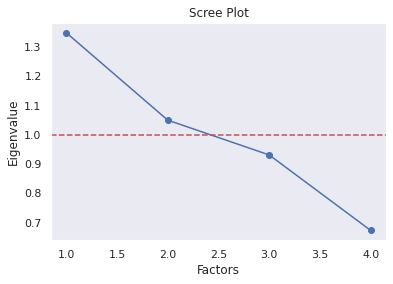

             Factor-1  Factor-2  Factor-3  Factor-4
Gender       0.087424  0.252300  0.046179       0.0
Age          0.571262  0.033053  0.056008       0.0
Income      -0.032685  0.240369 -0.029838       0.0
Spend Score -0.572270 -0.034760  0.014966       0.0
             Factor-1  Factor-2  Factor-3  Factor-4
Gender            NaN       NaN       NaN       NaN
Age          0.571262       NaN       NaN       NaN
Income            NaN       NaN       NaN       NaN
Spend Score -0.572270       NaN       NaN       NaN
             Elders Spend More   2   3   4
Gender                     NaN NaN NaN NaN
Age                   0.571262 NaN NaN NaN
Income                     NaN NaN NaN NaN
Spend Score          -0.572270 NaN NaN NaN
             communalities
Income            0.059736
Gender            0.073431
Spend Score       0.328925
Age               0.330569


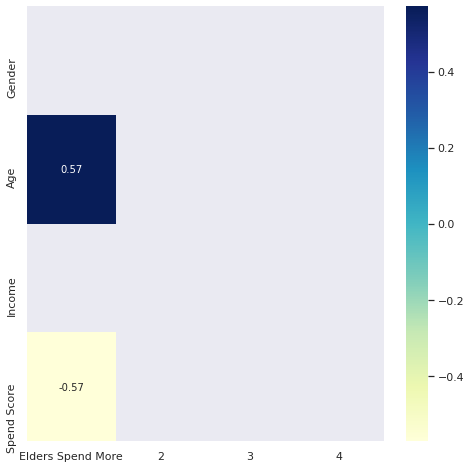

In [278]:
# Same dataset (Mall Customers) is used with the one used for clustering algorithms

data_fa = data.copy() 

# Using EFA to Create Segments

kmo_all,kmo_model=calculate_kmo(data_fa)
print( "Kaiser-Meyer-Olkin Test: ",kmo_model)

fa = FactorAnalyzer(rotation=None, n_factors=len(data_fa.columns))
fa.fit(data_fa)

# Check for eigen values
ev, v = fa.get_eigenvalues()
print("Eigenvalues: ",ev)

plt.scatter(range(1,data_fa.shape[1]+1),ev)
plt.plot(range(1,data_fa.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid()
plt.show()
plt.close()

# Create Segments and Review Loadings

fa = FactorAnalyzer(rotation="varimax", n_factors=5)
fa.fit(data_fa)

# Check loadings
loadings = pd.DataFrame(fa.loadings_)
loadings.rename(columns = lambda x: 'Factor-' + str(x + 1), inplace=True)
loadings.index = data_fa.columns
print(loadings)

def color_factor_importance(val):
    if np.abs(val) > 0.4:
        color = 'green'
    elif np.abs(val) > 0.3 and np.abs(val) <= 0.4:
        color = 'blue'
    else: 
        color = 'red'
    return 'color: %s' % color

loadings.style.applymap(color_factor_importance)

# Segments

segments = loadings[loadings >= .4].fillna(loadings[loadings <= -.4])
print(segments)

segment_names = ["Elders Spend More","2","3","4"]
segments.columns = segment_names
print(segments)

communalities = fa.get_communalities()
communalities = pd.DataFrame(communalities, index=data_fa.T.index, columns=['communalities'])
print(communalities.sort_values(by=['communalities'], ascending=True).head(8))

# Graph with factor loadings 

#Heatmap of loadings
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
sns.heatmap(segments, annot=True, cmap="YlGnBu")
plt.show()
plt.close()